In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Cette fonction range les valeurs de notre fichier csv dans une liste de 5 liste, la première n'étant pas utilisé.
def CsvToList(strfile, sumline=20000):
    seir = [
        [],
        [],
        [],
        [],
        []
    ]
    with open(strfile, 'r') as source:
        for line in source:
            if not (line[0] == 'S' or line[0]=="#"):
                newline = line[:-1].split(', ')
                for i in range(0, len(newline)):
                    seir[i].append(int(newline[i]) / sumline)
    return seir

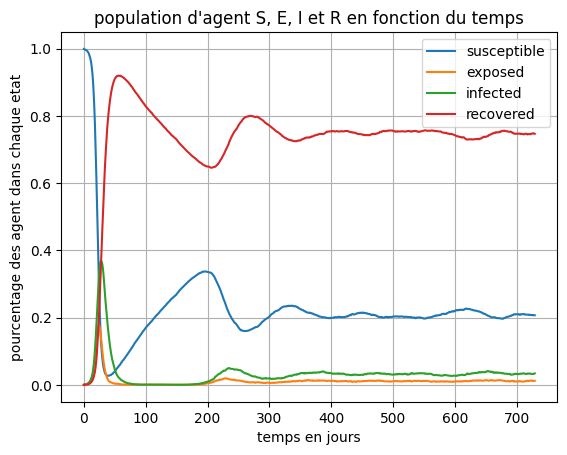

In [11]:
# Cette fonction génère un graph à partir d'un seul fichier csv/dat
def generateGraph(intfile, sumline=20000):
    seir = CsvToList('../data/output_generation_'+str(intfile)+'_1234.dat', sumline) 

    time = []
    for i in range(len(seir[0])):
        time.append(i)
    plt.plot(time, seir[1], label='susceptible')
    plt.plot(time, seir[2], label='exposed')
    plt.plot(time, seir[3], label='infected')
    plt.plot(time, seir[4], label='recovered')

    plt.xlabel('jours')
    plt.ylabel('pourcentage des agents dans chaque etats')
    plt.title("population d'agent selon leurs états en fonction du temps")
    plt.legend()
    plt.grid()
    plt.show()


generateGraph(0)

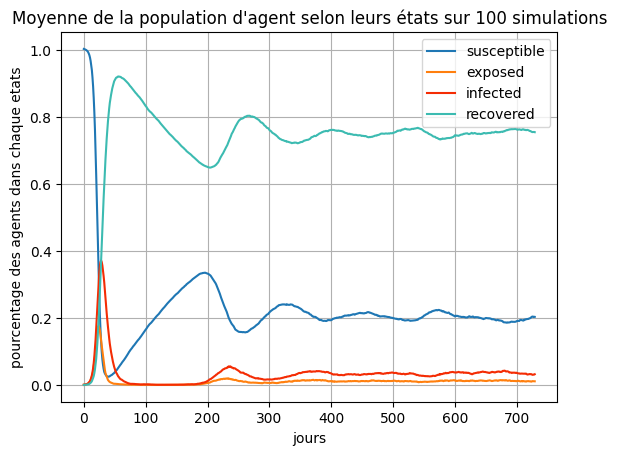

In [39]:
# fonction permettant d'afficher la moyenne de pusieurs fichier csv

def moyenneOfCsv(numberOfCsv, sumline=20000):
    Moyenneseir = CsvToList('../data/output_generation_0_1234.dat', sumline)

    for i in range(1, numberOfCsv):

        seir = CsvToList('../data/output_generation_'+str(i)+'_1234.dat', sumline)


        for j in range(4):

            for k in range(len(Moyenneseir[j])):
                Moyenneseir[j][k] += seir[j][k] / sumline

    time = []
    for i in range(len(Moyenneseir[0])):
        time.append(i)
    plt.plot(time, Moyenneseir[1], label='susceptible')
    plt.plot(time, Moyenneseir[2], label='exposed')
    plt.plot(time, Moyenneseir[3], label='infected', color='#F42C04')
    plt.plot(time, Moyenneseir[4], label='recovered', color='#3CBBB1')

    plt.xlabel('jours')
    plt.ylabel('pourcentage des agents dans chaque etats')
    plt.title("Moyenne de la population d'agent selon leurs états sur 100 simulations")
    plt.legend()
    plt.grid()
    plt.show()


moyenneOfCsv(100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


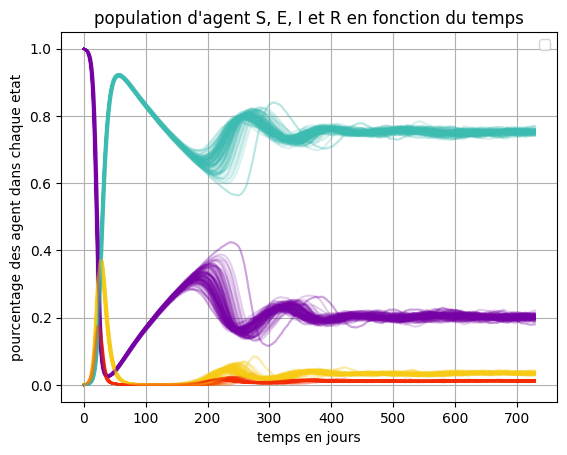

In [42]:
def generateAllOfGraphInOne():

    for j in range(100):
        seir = CsvToList('../data/output_generation_'+str(j)+'_1234.dat')

        time = []
        for i in range(len(seir[0])):
            time.append(i)
        plt.plot(time, seir[1], color='#7601A4', alpha=0.2)
        plt.plot(time, seir[2], color='#F42C04', alpha=0.2)
        plt.plot(time, seir[3], color='#F7CB15', alpha=0.2)
        plt.plot(time, seir[4], color='#3CBBB1', alpha=0.2)

    plt.xlabel('temps en jours')
    plt.ylabel('pourcentage des agent dans chaque etat')
    plt.title("population d'agent S, E, I et R en fonction du temps")
    plt.legend()
    plt.grid()
    plt.show()


generateAllOfGraphInOne()